In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [43]:
df = pd.read_csv('taxi_trip_pricing.csv')
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [45]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [47]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [49]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [51]:
df.shape

(1000, 11)

In [53]:
# TRIP DISTANCE KM (dealing first column)........................................................

In [55]:
# filling missing values with the median
df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].median(), inplace=True)

In [57]:
# Handling Outliers:

df['Trip_Distance_km'] = df['Trip_Distance_km'].apply(lambda x: 25.83 if x > 74 else x)

In [59]:
# Time of Day (Analysing & Preprocessing column 2).....................................................

In [61]:
df['Time_of_Day'].count()

# There are 50 missing values in Time_of_Day

950

In [63]:
df['Time_of_Day'].unique()

array(['Morning', 'Afternoon', 'Evening', 'Night', nan], dtype=object)

In [65]:
df['Time_of_Day'].fillna('Afternoon', inplace=True) # filling missing values with afternoon

In [67]:
df['Time_of_Day'].count() #all  missing values have been dealt

1000

In [69]:
label = LabelEncoder() #Creates an instance of LabelEncoder, which will be used to transform categorical values into numbers.

In [71]:
df['Time_of_Day'] = label.fit_transform(df['Time_of_Day']) #Transforms them into numeric labels.

In [75]:
df['Time_of_Day'].unique() 
# Morning   →  2
# Evening     →  0
# Afternoon →  1
# Night   →  3

array([2, 0, 1, 3])

In [77]:
# Day of Week (Analysing and pre-processing column 3)...........................................................

In [79]:
df['Day_of_Week'].count()

# There are 50 missing values in Day_of_Week

950

In [81]:
df['Day_of_Week'].unique()

array(['Weekday', 'Weekend', nan], dtype=object)

In [93]:
df['Day_of_Week'].fillna('Weekday', inplace= True)

In [95]:
df['Day_of_Week'].count()

1000

In [97]:
df['Day_of_Week'] = label.fit_transform(df['Day_of_Week'])

In [99]:
df['Day_of_Week'].unique()

array([0, 1])

In [101]:
# Passenger Count  (Analysing and pre-processing column 3)...........................................................

In [105]:
df['Passenger_Count'].count()
#50 missing values..

950

In [107]:
df['Passenger_Count'].unique()

array([ 3.,  1.,  4.,  2., nan])

In [111]:
df['Passenger_Count'].mean()

2.4768421052631577

In [113]:
df['Passenger_Count'].median()

2.0

In [115]:
df['Passenger_Count'].mode()

0    3.0
Name: Passenger_Count, dtype: float64

In [117]:
Q1 = df['Passenger_Count'].quantile(0.25)  # First quartile
Q3 = df['Passenger_Count'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range
IQR

1.75

In [119]:
# Impute missing values with the median
df['Passenger_Count'].fillna(df['Passenger_Count'].median(), inplace=True)

In [121]:
df['Passenger_Count'].count()

1000

In [123]:
# now we will handle the outliar....

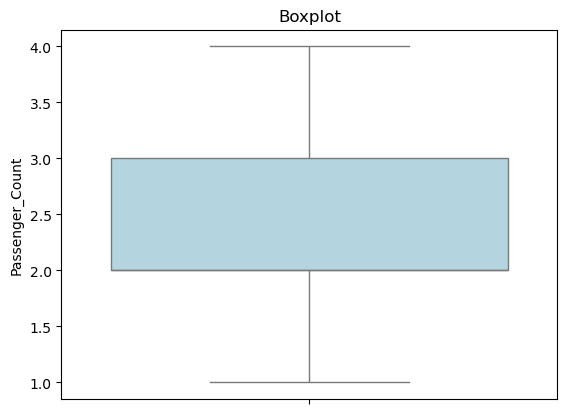

In [127]:
# Finding outliers through Box and whisker plot

sns.boxplot(data=df['Passenger_Count'], color='lightblue')
plt.title('Boxplot')
plt.show()
# no outliar seen...

In [129]:
# Traffic Conditions (Analysing and pre-processing column 5)

In [131]:
df['Traffic_Conditions'].count()

# There are 50 missing values in Traffic_Conditions

950

In [135]:
df['Traffic_Conditions'].unique()

array(['Low', 'High', 'Medium', nan], dtype=object)

In [137]:
df['Traffic_Conditions'].mode() # the mode is the most frequent value

0    Low
Name: Traffic_Conditions, dtype: object

In [163]:
df['Traffic_Conditions'].fillna('Low', inplace=True)

In [165]:
df['Traffic_Conditions'].count()

1000

In [167]:
df['Traffic_Conditions'] = label.fit_transform(df['Traffic_Conditions'])

In [169]:
df['Traffic_Conditions'].unique()

array([1, 0, 2, 3], dtype=int64)

In [171]:
# Weather (Analyzing and pre-processing column 6).....................................................................

In [173]:
df['Weather'].count()

# There are 50 missing values in Time_of_Day

950

In [175]:
df['Weather'].mode()

0    Clear
Name: Weather, dtype: object

In [177]:
df['Weather'].fillna('Clear', inplace=True)

In [179]:
df['Weather'].count()

1000

In [181]:
df['Weather'] = label.fit_transform(df['Weather'])

In [183]:
df['Weather'].unique()

array([0, 1, 2])

In [185]:
# Base Fare (Analyzing and pre-processing column 7)............................................................

In [187]:
df['Base_Fare'].count()

950

In [189]:
df['Base_Fare'].fillna(df['Base_Fare'].mean(), inplace=True)

In [191]:
df['Base_Fare'].count()

1000

In [193]:
# Per km Rate (Analyzing and pre-processing column 8)...................................................................

In [195]:
df['Per_Km_Rate'].count()

950

In [197]:
df['Per_Km_Rate'].fillna(df['Per_Km_Rate'].mean(), inplace=True)

In [199]:
df['Per_Km_Rate'].count()

1000

In [201]:
# Per minute Rate (Analyzing and pre-processing column 9).................................................................

In [203]:
df['Per_Minute_Rate'].count()

950

In [205]:
df['Per_Minute_Rate'].fillna(df['Per_Minute_Rate'].mean(), inplace=True)

In [207]:
df['Per_Minute_Rate'].count()

1000

In [209]:
# Trip duration minutes ((Analyzing & pre-processing column 10)...................................................

In [211]:

df['Trip_Duration_Minutes'].count()

950

In [213]:
df['Trip_Duration_Minutes'].fillna(df['Trip_Duration_Minutes'].mean(), inplace=True)

In [215]:
df['Trip_Duration_Minutes'].count()

1000

In [217]:
# Trip price (Analyzing and pre-processing column 11)...................................................................

In [219]:
df['Trip_Price'].fillna(df['Trip_Price'].median(), inplace=True)

In [221]:
df['Trip_Price'] = df['Trip_Price'].apply(lambda x: 50 if x > 117 else x)

In [223]:
# now we will move to testing and traing part.............................................

In [231]:
X = df.drop(columns=['Trip_Price'])
y = df[['Trip_Price']]

In [239]:
scaler = MinMaxScaler() 
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [241]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [243]:
model = LinearRegression()

In [245]:
model.fit(X_train,y_train)

LinearRegression()

In [249]:
y_pred = model.predict(X_test)

In [251]:
mse = mean_squared_error(y_test,y_pred)

In [253]:
mse

0.011897303213194156

In [257]:
np.sqrt(mse)

0.1090747597439213

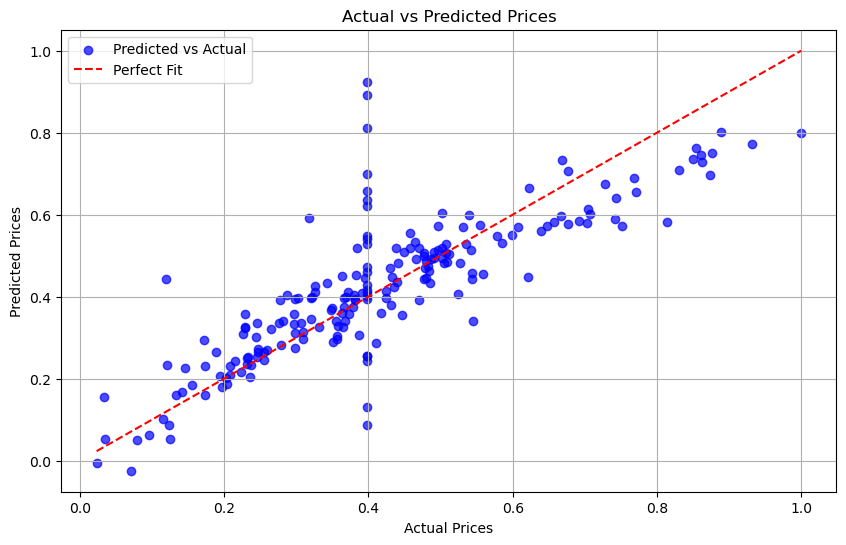

In [259]:
# Scatterplot for actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted vs Actual')

# Plot a perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')

# Labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()
